# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare KS test to visual approaches for checking normality assumptions
* Plot CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import necessary libraries and generate some data 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


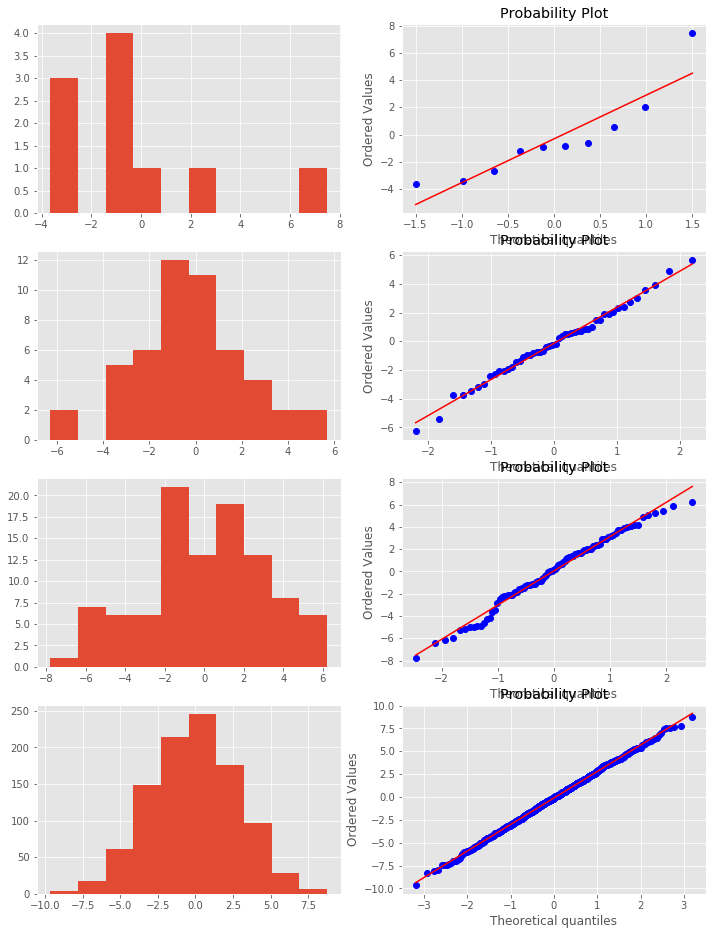

In [22]:
# Plot histograms and QQplots for above datasets
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2, figsize = (12,16))
ax1.hist(x_10)
stats.probplot(x_10, plot = ax2)
ax3.hist(x_50)
stats.probplot(x_50, plot = ax4)
ax5.hist(x_100)
stats.probplot(x_100, plot = ax6)
ax7.hist(x_1000)
stats.probplot(x_1000, plot = ax8)
plt.show()

# You code here


In [ ]:
# You comments here 
# The histogram is good for checking normaility for large samples. The same is true for the qq-plots, although
# the qq-plots also work with relatively smaller samples.

### Creat a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3 , having same number of values as data

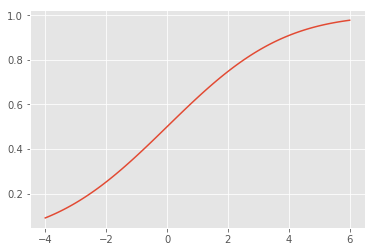

In [43]:
data = stats.norm.rvs(loc=0, scale=3, size=100)
fig = plt.figure()
x = np.linspace(-4, 6, 100)
plt.plot(x, stats.norm.cdf(x, 0, 3))

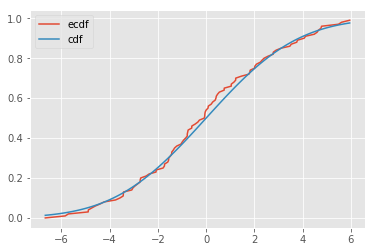

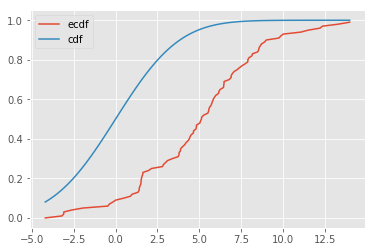

In [49]:
# You code here 

def ks_plot(data):
    fig = plt.figure()
    x = np.sort(data)
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label = 'ecdf')
    plt.plot
    start = x.min()
    end = x.max()
    x2 = np.linspace(start, end, 100)
    plt.plot(x2, stats.norm.cdf(x2, loc = 0, scale = 3), label = 'cdf')
    plt.legend()
    plt.show()
    return None
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))



This is awesome. The difference between two cdfs in the second plot show that sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

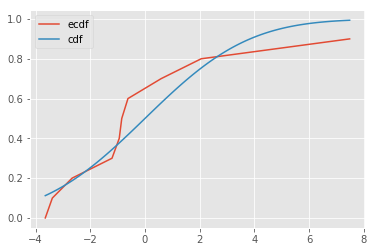

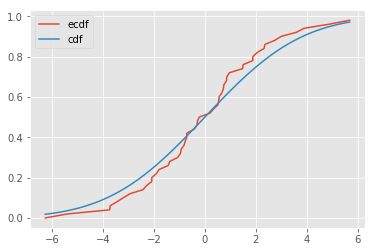

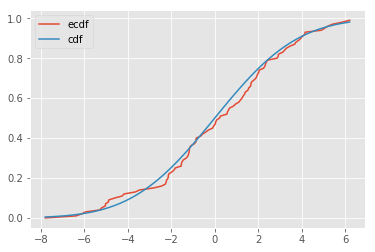

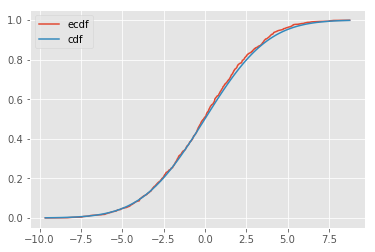

In [50]:
# Your code here 
ks_plot(x_10)
ks_plot(x_50)
ks_plot(x_100)
ks_plot(x_1000)


In [ ]:
# Your comments here 
# As the sample gets bigger, the difference becomes negligible

### KS test in SciPy

Lets run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run KS test for normality assumption using the datasets created earlier and comment on the output
- Perform test KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null, and conclude our sample distribution is not identical to a normal distribution.

In [51]:
# Perform KS test 

# Your code here 

for i in [x_10,x_50,x_100,x_1000]:
    print (stats.kstest(i, 'norm', args=(0, 3)))


# KstestResult(statistic=0.20726402525186666, pvalue=0.7453592647579976)
# KstestResult(statistic=0.11401670469341446, pvalue=0.506142501491317)
# KstestResult(statistic=0.06541325864884379, pvalue=0.7855843705750273)
# KstestResult(statistic=0.026211483799585156, pvalue=0.4974218016349998)

KstestResult(statistic=0.2822108215636446, pvalue=0.33827799040468)
KstestResult(statistic=0.11396643526316219, pvalue=0.5067408270869669)
KstestResult(statistic=0.06468972480893365, pvalue=0.7968016913814657)
KstestResult(statistic=0.026563930805644675, pvalue=0.4791429314066271)


In [120]:
# Your comments here 
# All of the p-values > 0.5, so we fail to reject H0 and all the distributions are identical to a normal distribution


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [63]:
# Try with a uniform distubtion
x_uni = np.random.rand(1000)

print (stats.kstest(x_uni, 'uniform'))
print (stats.kstest(x_uni, 'norm', args=(0, 3)))

# KstestResult(statistic=0.025244449633212818, pvalue=0.5469114859681035)
# KstestResult(statistic=0.5001459915784039, pvalue=0.0)

KstestResult(statistic=0.020694944470352944, pvalue=0.7851170467087655)
KstestResult(statistic=0.5002995596267236, pvalue=0.0)


In [61]:
# Your comments here 
# the distribution does match a uniform dist, but not a normal one.

## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

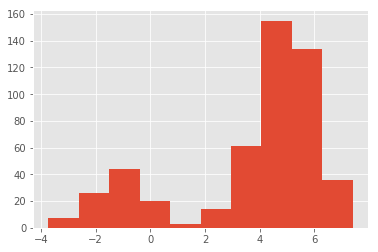

In [65]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);
N2 = 100
x_100_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N2)), np.random.normal(5, 1, int(0.4 * N2))))[:, np.newaxis]

### Plot the CDFs for x_100_bimodal and x_1000 and comment on the output 

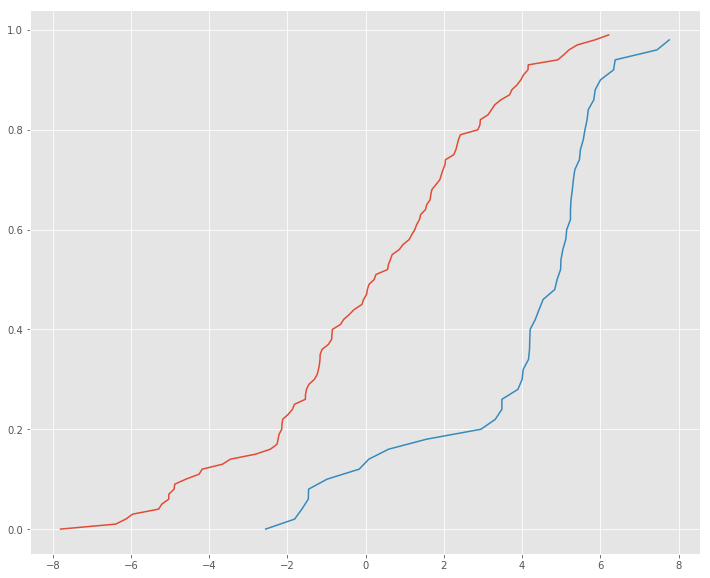

In [76]:

# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    fig = plt.figure(figsize = (12,10))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
        
    '''
    Data entereted must be the same size.
    '''
    return None

# Uncomment below to run
ks_plot_2sample(x_100, x_100_bi[:,0])

In [ ]:
# You comments here 


### Run the two sample KS test on x_100 and x_100_bi and comment on the results

In [74]:
# You rcode here
print(stats.ks_2samp(x_100, x_100_bi[:,0]))
# Ks_2sampResult(statistic=0.575, pvalue=1.2073337530608254e-14)

Ks_2sampResult(statistic=0.64, pvalue=7.307536190244733e-13)


In [134]:
# Your comments here 



## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 